In [1]:
from Controller import TrainingController, ExplainingController
from Utils.SaveUtils import load_parameters
from Parameters import TrainingParameters, PredictingParameters
import tensorflow as tf
from IPython.core.display import display, HTML
import json
import numpy as np


In [2]:
folder_path = "./SavedModels/%s" % (
"0.7700_Diabetes_BaseNNModel_2021-05-30 04:41:24.179089"
)   

In [3]:
parameters_json = load_parameters(folder_path=folder_path)
parameters = TrainingParameters(**parameters_json)
tf.random.set_seed(parameters.dataset_split_seed)
np.random.seed(parameters.dataset_split_seed)
parameters.load_model_folder_path = folder_path
predicting_parameters = PredictingParameters()
predicting_parameters.load_model_folder_path = folder_path

In [4]:
trainer = TrainingController(parameters=parameters)


| Running on /job:localhost/replica:0/task:0/device:CPU:0  

| Load mean and variance 

| Model loaded successfully from: ./SavedModels/0.7700_Diabetes_BaseNNModel_2021-05-30 04:41:24.179089  


In [5]:
explainer = ExplainingController(parameters=parameters, predicting_parameters = predicting_parameters)


| Running on /job:localhost/replica:0/task:0/device:CPU:0  

| Model loaded successfully from: ./SavedModels/0.7700_Diabetes_BaseNNModel_2021-05-30 04:41:24.179089  


In [6]:
explainer.show_model_info()

Model: "base_nn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (1, 1)                    841       
Total params: 841
Trainable params: 713
Non-trainable params: 128
_________________________________________________________________

| Loaded model has been trained for [350] steps, [50] epochs 


In [7]:
########### Get example data from trainer ###########
unbatch_test = trainer.test_dataset.unbatch()
print("Test set length: %d" %(len(list(unbatch_test.as_numpy_iterator()))))
index_from_test = 20

Test set length: 100


In [8]:
example_data = trainer.dataset.collate_fn([list(unbatch_test.as_numpy_iterator())[index_from_test]])[0]

In [9]:
############ Generate examplaination ############
cat_df, predicted_value, bn, bn_html, inference, infoBN, markov_blanket_html= explainer.medical_predict_lindaBN_explain(example_data,2000, variance=.1, clip_permutation=False) 


| Selecting Greedy Hill Climbing Algorithm 


In [10]:
generated_html = explainer.generate_html_page_from_graphs(json.dumps(example_data.numpy().tolist()), str(predicted_value), bn_html, inference, infoBN, markov_blanket_html)
display(HTML(generated_html))

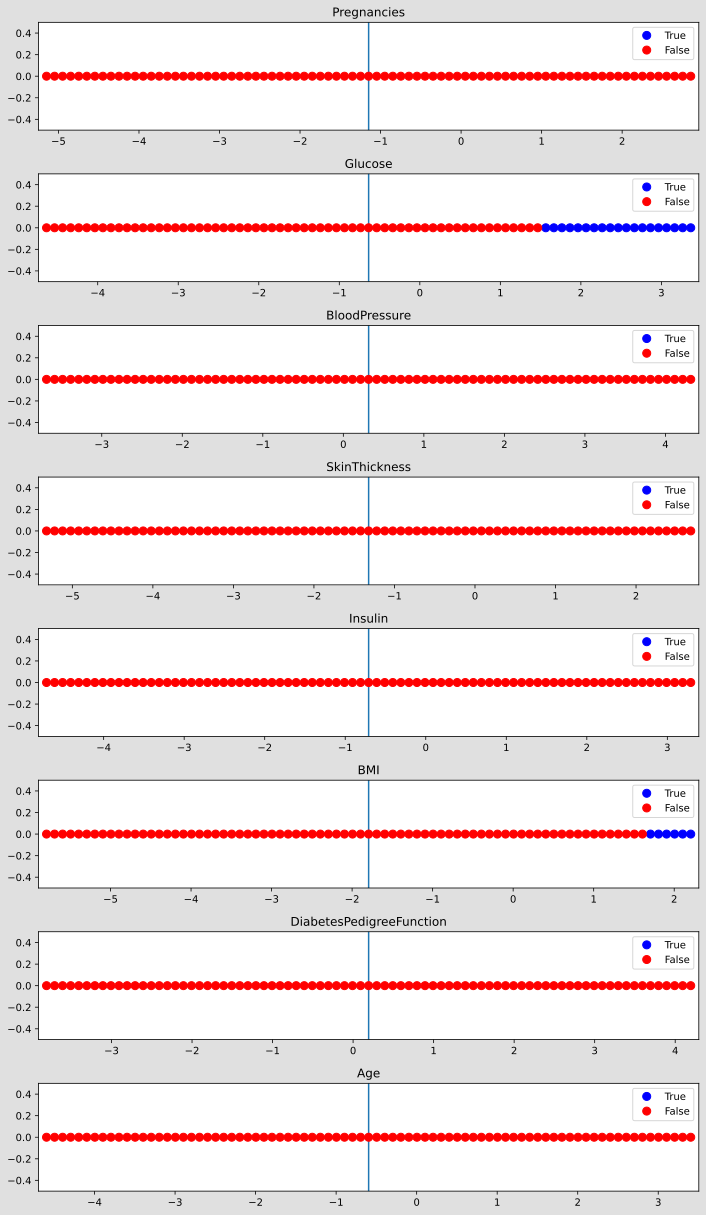

In [11]:
explainer.medical_check_boundary(example_data, variance=0.1, steps= 40)